In [1]:
# This Python file uses the following encoding: utf-8

# Analise.ipynb
# Github:@WeDias

# MIT License
#
# Copyright (c) 2020 Wesley R. Dias
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


from time import time
from random import randint


class Analisador:
    """Classe criada para obter os tempos de execução
    dos seguintes algoritmos de ordenação:
    1.Built-in Python
    2.Quicksort
    3.Mergesort
    4.Seleção
    """
    _tempo_total = 0
    _resultados = {
        'nativo': {},
        'quicksort': {},
        'mergesort': {},
        'selecao': {}
    }

    # noinspection PyUnusedLocal
    def __init__(self, inicio: int = 2000, fim: int = 22000,
                 passo: int = 2000, intervalo: tuple = (0, 20000)):
        """Serve para iniciar o processo de obtenção dos tempos de execução de cada algoritmo
        :param inicio: int, número inicial de elementos aleatórios da lista, padrão 2000
        :param fim: int, número final de elementos aleatórios da lista, padrão 22000
        :param passo: int, número de elementos incrementados a cada teste, padrão 2000
        :param intervalo: tuple, intervalo de números aleatórios, padrão (0, 20000)
        """
        inicio_exec = time()
        algoritmos = {
            'nativo': self._nativo,
            'quicksort': self._quicksort,
            'mergesort': self._mergesort,
            'selecao': self._selecao
        }
        for amostra in range(inicio, fim + 1, passo):
            array = [randint(intervalo[0], intervalo[1]) for a in range(amostra)]
            for nome_algo, algoritmo in algoritmos.items():
                self._temporizador(nome_algo, algoritmo, array, amostra)
        self._tempo_total = time() - inicio_exec
        print(f'Tempo total de execução: {self._tempo_total:.2f}s\n')

    def resultado(self) -> dict:
        """Serve para retornar um dicionário com os dados de tempo de
        execução de cada algoritmo em cada caso de teste
        :return: dict, dados do tempo de execução de cada algoritmo
        """
        return self._resultados

    @staticmethod
    def _temporizador(nome_algo: str, algoritmo, array: list, amostra: int) -> None:
        """Serve para registrar o tempo gasto para um algoritmo de
        ordenação ser executado e ordenar uma determinada lista
        :param nome_algo: str, nome do algoritmo
        :param algoritmo: function, algoritmo a ser executado
        :param array: list, lista de elementos a ser ordenada
        :param amostra: int, número de elementos da lista
        :return: None
        """
        inicio_exec_algo = time()
        algoritmo(array)
        Analisador._resultados[nome_algo][amostra] = round(time() - inicio_exec_algo, 3)

    @staticmethod
    def _nativo(array: list) -> list:
        """Algoritmo de ordenação Built-in do Python, serve para ordenar listas
        :param array: list, lista de elementos a ser ordenada
        :return: list, lista de elementos ordenados
        """
        return sorted(array)

    @staticmethod
    def _quicksort(array: list) -> list:
        """Algoritmo de ordenação Quicksort, serve para ordenar listas
        :param array: list, lista de elementos a ser ordenada
        :return: list, lista de elementos ordenados
        """
        if len(array) <= 1:
            return array
        m = array[0]
        return Analisador._quicksort(
            [x for x in array if x < m]) + \
            [x for x in array if x == m] + \
            Analisador._quicksort([x for x in array if x > m])

    @staticmethod
    def _selecao(array: list) -> list:
        """Algoritmo de ordenação Seleção, serve para ordenar listas
        :param array: list, lista de elementos a ser ordenada
        :return: list, lista de elementos ordenados
        """
        r = []
        while array:
            m = min(array)
            r.append(m)
            array.remove(m)
        return r

    @staticmethod
    def _mergesort(array: list) -> list:
        """Algoritmo de ordenação Mergesort, serve para ordenar listas
        :param array: list, lista de elementos a ser ordenada
        :return: list, lista de elementos ordenados
        """
        if len(array) <= 1:
            return array
        else:
            m = len(array) // 2
            e = Analisador._mergesort(array[:m])
            d = Analisador._mergesort(array[m:])
            return Analisador._merge(e, d)

    @staticmethod
    def _merge(e:list , d: list) -> list:
        """Serve para auxiliar no Mergesort
        :param e: list, Lista da esquerda
        :param d: list, Lista da direita
        :return: list, lista de elementos ordenados
        """
        r = []
        i, j = 0, 0
        while i < len(e) and j < len(d):
            if e[i] <= d[j]:
                r.append(e[i])
                i += 1
            else:
                r.append(d[j])
                j += 1
        r += e[i:]
        r += d[j:]
        return r

In [2]:
# Obtenção dos dados de execução dos algoritmos
from pandas import DataFrame

analise = Analisador()
df = DataFrame.from_dict(analise.resultado())
print(df)

Tempo total de execução: 30.01s

       nativo  quicksort  mergesort  selecao
2000    0.000      0.008      0.014    0.052
4000    0.000      0.018      0.028    0.223
6000    0.000      0.035      0.053    0.479
8000    0.001      0.044      0.075    0.852
10000   0.001      0.043      0.092    1.351
12000   0.002      0.065      0.125    1.976
14000   0.002      0.059      0.116    2.651
16000   0.003      0.069      0.137    3.470
18000   0.003      0.091      0.177    4.422
20000   0.004      0.127      0.214    5.439
22000   0.004      0.100      0.191    6.954


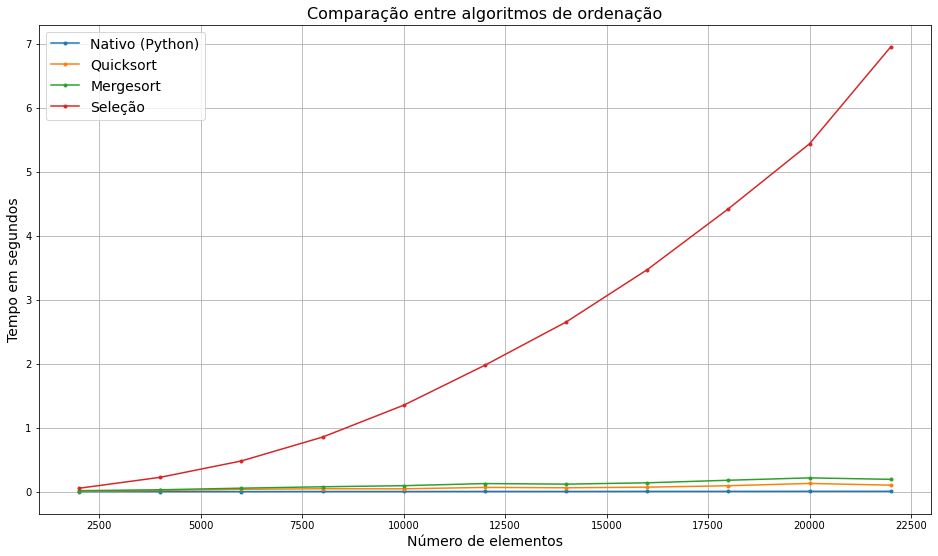

In [3]:
# Geração do gráfico comparativo
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(df, marker='.')
plt.title('Comparação entre algoritmos de ordenação', size=16)
plt.legend(('Nativo (Python)', 'Quicksort', 'Mergesort', 'Seleção'), fontsize=14)
plt.xlabel('Número de elementos', size=14)
plt.ylabel('Tempo em segundos', size=14)
plt.grid()
plt.show()